In [43]:
# imports import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup
import json
import requests
import matplotlib.pyplot as plt

In [27]:
''' TODO actually make this into a list'''
url_list = 'http://ultrasignup.com/service/events.svc/results/51691/json?_search=false'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
results = page.json()
df = pd.DataFrame.from_dict(results)

In [94]:
irrelevant = ['age_rank','photo_count','prior_count','race_count', 'drilldown','time', 'status'] # do not need these 
for col in df.columns:
    if col in irrelevant:
        del df[col]
df.head()

,age,agegroup,bib,city,firstname,formattime,gender,gender_place,lastname,participant_id,place,runner_rank,state
0,34,30-39,98,Richland,Jesse,18:03:00,M,1,Lang,240580,1,90.20,WA
1,36,30-39,26,Spokane,Brandon,19:05:48,M,2,Benefield,917459,2,92.77,WA
2,38,30-39,74,San Diego,Lindsay,19:49:31,M,3,Hamoudi,336440,3,84.33,CA
3,33,30-39,30,Issaquah,Bryan,21:54:27,M,4,Bhark,672855,4,94.01,WA
4,32,30-39,170,Kirkland,Phil,21:55:56,M,5,Shaw,2034,5,91.41,WA


In [95]:
age_dict = {}
sum_age = df.loc[df['state'] == 'WA', 'age'].sum()
avg_age = sum_age / len(df[df['state'] == 'WA'])
avg_age

for state in df.state.unique():
    sum_age = df.loc[df['state'] == state, 'age'].sum()
    age_dict[state] = "{0:.2f}".format(sum_age / len(df[df['state'] == state]))
age_dict

{'WA': '42.08',
 'CA': '38.47',
 'OR': '40.67',
 'ID': '38.00',
 'MT': '43.75',
 'BC': '46.25',
 'JPN': '44.20',
 'IL': '36.00',
 'MI': '36.00',
 'CO': '37.14',
 'NH': '60.00',
 'NC': '47.33',
 'MEX': '34.00',
 'TN': '34.00',
 'FL': '43.00',
 'ME': '49.00',
 'VT': '50.00',
 'WI': '44.00',
 'GA': '41.00',
 'MN': '29.00',
 'SK': '41.00',
 'TX': '36.00',
 'AL': '31.00',
 'PAN': '40.00',
 'AB': '62.00'}

[]

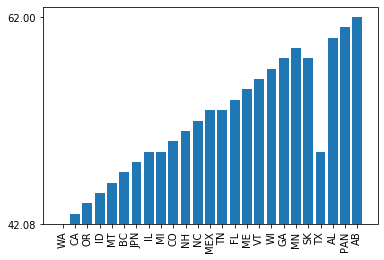

In [109]:
# CAN MAKE THIS BETTER
import numpy as np
plt.bar(range(len(age_dict)), age_dict.values(), align='center')
x = plt.xticks(range(len(age_dict)), list(age_dict.keys()), rotation='vertical')

plt.yticks(np.arange(0, 101, 20))

plt.plot()